In [1]:
# 使用K-Means算法聚类消费行为特征数据
import pandas as pd

In [2]:
# 初始化数据
# 客户消费情况数据 -> R => 最近一次消费时间间隔 F => 消费频率 M => 消费总金额
inputfile = 'E:\\NLP\\Python数据分析与挖掘实战\\chapter5\\demo\\data\\consumption_data.xls'
# 导出路径
outputfile = 'E:\\NLP\\Python数据分析与挖掘实战\\chapter5\\demo\\tmp\\consumption_data_out.xls'

In [3]:
# 聚类的类型(几类)
k = 3
# 聚类最大循环次数
iteration = 500

In [4]:
# 读取数据, 根据ID
data = pd.read_excel(inputfile, index_col = 'Id')
# 标准差规范化 -> 处理后的数据均值为 0， 标准差为 1 => 数据标准化
data_zs = 1.0 * (data - data.mean()) / data.std()

In [5]:
# KMeans
from sklearn.cluster import KMeans
# 分为 k 类， 并发数是 4, 最大迭代 500 次
model = KMeans(n_clusters = k, n_jobs = 4, max_iter = iteration)
# 开始聚类
model.fit(data_zs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
# 简单打印结果
# 统计各个类别的数目
r1 = pd.Series(model.labels_).value_counts()
# 找出聚类中心
r2 = pd.DataFrame(model.cluster_centers_)
print(r1)
print(r2)
# 横向连接(0为纵向)，得到聚类中心对应的类别下的数目
r = pd.concat([r2, r1], axis = 1)
# 重命名表头
r.columns = list(data.columns) + [u'类别数目']
print(r)

0    559
1    341
2     40
dtype: int64
          0         1         2
0 -0.149353 -0.658893 -0.271780
1 -0.160451  1.114802  0.392844
2  3.455055 -0.295654  0.449123
          R         F         M  类别数目
0 -0.149353 -0.658893 -0.271780   559
1 -0.160451  1.114802  0.392844   341
2  3.455055 -0.295654  0.449123    40


In [7]:
# 详细输出原始数据及其类别
# 输出每个样本对应的类别
r = pd.concat([data, pd.Series(model.labels_, index = data.index)], axis = 1)
# 重命名表头
r.columns = list(data.columns) + [u'聚类类别']
# 保存结果
r.to_excel(outputfile)

### 注意，Scikit-Learn中的 K-Means 算法仅仅支持欧式距离，原因在于采用其他的距离并不一定能够保证算法的收敛性
> ### p_108看看表格结果

In [8]:
'''
# 绘制聚类后的概率密度图
# 自定义作图函数
def density_plot(data, title):
    # 导入图像库
    import matplotlib.pyplot as plt
    # 正常显示中文标签, 设置 FangSong/黑体
    plt.rcParams['font.sans-serif'] = [u'SimHei']
    # 解决 负号 的显示问题
    plt.rcParams['axes.unicode_minus'] = False
    # 创建绘图区域
    plt.figure()
    # 逐行作图 -> 取一行的数据
    for i in range(len(data.iloc[0])):
        (data.iloc[:, i]).plot(kind = 'kde', label = data.columns[i], linewidth = 2)
    plt.xlabel(u'人数')
    plt.ylabel(u'密度')
    plt.title(u'聚类类别%s各属性的密度曲线' % title)
    plt.legend()
    return plt'''

"\n# 绘制聚类后的概率密度图\n# 自定义作图函数\ndef density_plot(data, title):\n    # 导入图像库\n    import matplotlib.pyplot as plt\n    # 正常显示中文标签, 设置 FangSong/黑体\n    plt.rcParams['font.sans-serif'] = [u'SimHei']\n    # 解决 负号 的显示问题\n    plt.rcParams['axes.unicode_minus'] = False\n    # 创建绘图区域\n    plt.figure()\n    # 逐行作图 -> 取一行的数据\n    for i in range(len(data.iloc[0])):\n        (data.iloc[:, i]).plot(kind = 'kde', label = data.columns[i], linewidth = 2)\n    plt.xlabel(u'人数')\n    plt.ylabel(u'密度')\n    plt.title(u'聚类类别%s各属性的密度曲线' % title)\n    plt.legend()\n    return plt"

In [9]:
'''
# 自定义作图函数
def density_plot(data):
    # 导入图像库
    import matplotlib.pyplot as plt
    # 正常显示中文标签, 设置 FangSong/黑体
    plt.rcParams['font.sans-serif'] = [u'SimHei']
    # 解决 负号 的显示问题
    plt.rcParams['axes.unicode_minus'] = False
    p = data.plot(kind = 'kde', linewidth = 2, subplots = True, sharex = False)
    [p[i].set_ylabel(u'密度') for i in range(k)]
    plt.legend()
    return plt'''

"\n# 自定义作图函数\ndef density_plot(data):\n    # 导入图像库\n    import matplotlib.pyplot as plt\n    # 正常显示中文标签, 设置 FangSong/黑体\n    plt.rcParams['font.sans-serif'] = [u'SimHei']\n    # 解决 负号 的显示问题\n    plt.rcParams['axes.unicode_minus'] = False\n    p = data.plot(kind = 'kde', linewidth = 2, subplots = True, sharex = False)\n    [p[i].set_ylabel(u'密度') for i in range(k)]\n    plt.legend()\n    return plt"

In [10]:
'''
# 概率密度图文件名前缀
pic_output = './pd_'
for i in range(k):
    density_plot(data[r[u'聚类类别'] == i]).savefig(u'%s%s.png' % (pic_output, i))'''

"\n# 概率密度图文件名前缀\npic_output = './pd_'\nfor i in range(k):\n    density_plot(data[r[u'聚类类别'] == i]).savefig(u'%s%s.png' % (pic_output, i))"

### 对比分析，分群 1 时间间隔较短，消费次数多，而且消费金额较大，是高消费，高价值人群
### 分群 2 时间间隔，消费次数和消费金额处于中等水平，代表这一般客户
### 分群 3 时间间隔较长，消费次数少，消费金额也不是特别高，是价值较低的客户群体

In [11]:
# 使用TSNE进行数据降维并展示聚类结果
from sklearn.manifold import TSNE

In [12]:
tsne = TSNE()
# 进行数据降维 => 输入的特征数是高维(大于三维)，一般难以直接以原特征对聚类结果进行展示，需要降维到2维或者3维的空间中展示聚类结果
tsne.fit_transform(data_zs)
# 转换数据格式
tsne = pd.DataFrame(tsne.embedding_, index = data_zs.index)

In [13]:
import matplotlib.pyplot as plt
# 正常显示中文标签, 设置 FangSong/黑体
plt.rcParams['font.sans-serif'] = [u'SimHei']
# 解决 负号 的显示问题
plt.rcParams['axes.unicode_minus'] = False

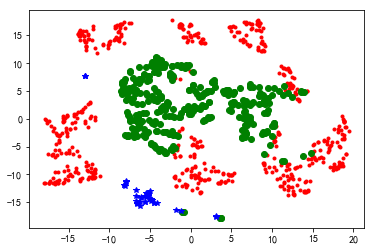

In [14]:
# 不同类型使用不同颜色和样式绘图
d = tsne[r[u'聚类类别'] == 0]
plt.plot(d[0], d[1], 'r.')
d = tsne[r[u'聚类类别'] == 1]
plt.plot(d[0], d[1], 'go')
d = tsne[r[u'聚类类别'] == 2]
plt.plot(d[0], d[1], 'b*')
plt.show()